In [4]:
import tensorflow as tf
import pandas as pd

#tf.debugging.set_log_device_placement(True)

physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [5]:
match_data = pd.read_csv('D:/riot/match/with_bibigo.csv')
match_data = match_data.sample(n = 120000, replace=False)
match_data = pd.get_dummies(match_data) #원핫
index = list(match_data.columns)
test = match_data.sample(frac=0.3, replace=False)
del index[0] #team1_win 빼기, 버전들은 원핫으로 뒤로 날아감
#print(index)
#print(match_data.head(1))
independent = match_data[index]
dependent = match_data[['team1_win']]
independent_test = test[index]
dependent_test = test[['team1_win']]
# print(독립_train)
# print(독립_test)
print(type(independent_test))

<class 'pandas.core.frame.DataFrame'>


In [6]:
print(dependent_test) 
print(independent.shape)

        team1_win
124524          0
295266          1
499973          1
224898          0
580616          1
...           ...
136106          1
789455          1
348175          0
367277          1
534378          0

[36000 rows x 1 columns]
(120000, 344)


In [9]:
X = tf.keras.layers.Input(shape=[344])
H = tf.keras.layers.Dense(800)(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)
H = tf.keras.layers.Dense(1000)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)
H = tf.keras.layers.Dense(500)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)
H = tf.keras.layers.Dense(500)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)
H = tf.keras.layers.Dense(300)(H)
# H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)
Y = tf.keras.layers.Dense(1)(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='mse',
              metrics='accuracy')

In [10]:
history = model.fit(independent, dependent, epochs=10, validation_data=(independent_test,dependent_test))

Epoch 1/10
3750/3750 [==============================] - 122s 32ms/step - loss: 0.3091 - accuracy: 0.5384 - val_loss: 0.2371 - val_accuracy: 0.5960
Epoch 2/10
3750/3750 [==============================] - 121s 32ms/step - loss: 0.2408 - accuracy: 0.5826 - val_loss: 0.2361 - val_accuracy: 0.6018
Epoch 3/10
3750/3750 [==============================] - 121s 32ms/step - loss: 0.2380 - accuracy: 0.5921 - val_loss: 0.2341 - val_accuracy: 0.6067
Epoch 4/10
3750/3750 [==============================] - 121s 32ms/step - loss: 0.2355 - accuracy: 0.6011 - val_loss: 0.2282 - val_accuracy: 0.6211
Epoch 5/10
3750/3750 [==============================] - 119s 32ms/step - loss: 0.2309 - accuracy: 0.6148 - val_loss: 0.2204 - val_accuracy: 0.6374
Epoch 6/10
3750/3750 [==============================] - 122s 32ms/step - loss: 0.2229 - accuracy: 0.6362 - val_loss: 0.2112 - val_accuracy: 0.6706
Epoch 7/10
3750/3750 [==============================] - 121s 32ms/step - loss: 0.2100 - accuracy: 0.6727 - val_loss: 0

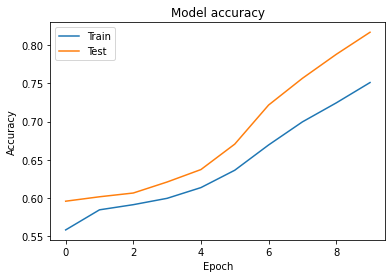

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [12]:
print(independent.dtypes)

team1_266                int64
team1_103                int64
team1_84                 int64
team1_12                 int64
team1_32                 int64
                         ...  
version_11.1.352.5559    uint8
version_9.11.275.6613    uint8
version_9.19.290.8808    uint8
version_9.20.292.2452    uint8
version_9.9.272.4950     uint8
Length: 344, dtype: object
